In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [16]:
# Read config.yaml
with open('../configs/config_banikoara.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [17]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head()

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
0,30/6/1981,97.99,28.12,71.06,220.44,2.39,0.54,226.76,-0.111216
1,31/7/1981,98.03,25.51,82.50,230.19,2.16,0.62,237.30,0.747892
2,31/8/1981,98.02,25.32,84.00,231.25,1.62,0.66,242.58,1.626116
3,30/9/1981,98.04,25.25,84.19,222.94,1.49,0.75,184.57,2.275244
4,31/10/1981,97.92,26.27,75.75,201.06,1.42,0.71,0.00,2.122502


In [18]:
dataset_path

'../datasets/raw/Banikoara_with_SPI6.csv'

In [19]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,97.99,28.12,71.06,220.44,2.39,0.54,226.76,-0.111216
1981-07-31,98.03,25.51,82.50,230.19,2.16,0.62,237.30,0.747892
1981-08-31,98.02,25.32,84.00,231.25,1.62,0.66,242.58,1.626116
1981-09-30,98.04,25.25,84.19,222.94,1.49,0.75,184.57,2.275244
1981-10-31,97.92,26.27,75.75,201.06,1.42,0.71,0.00,2.122502


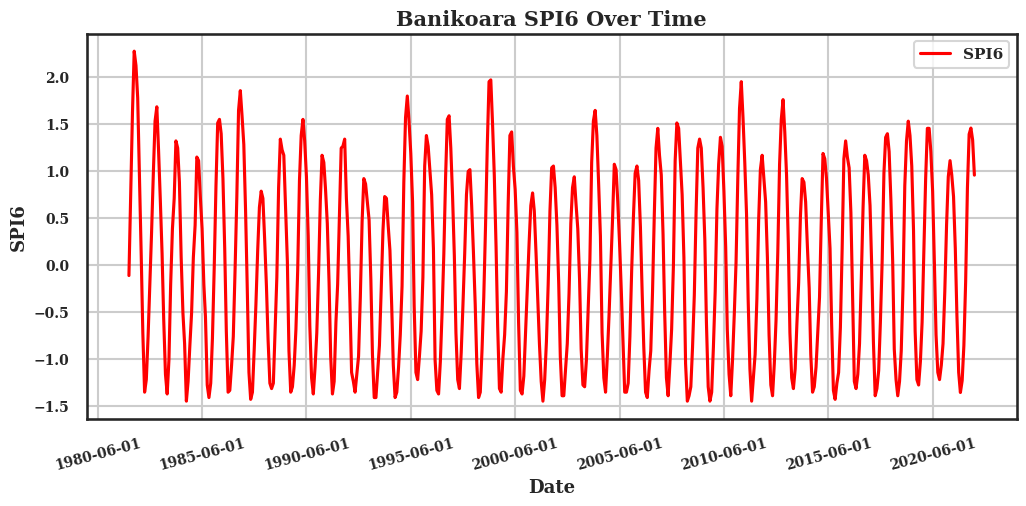

In [28]:
import matplotlib.dates as mdates

# Plot SPI6 in function of Date
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['SPI6'], label='SPI6', color='red')

# Adding grid
plt.grid(True)

# Adding Title
plt.title(data_params['city'] + ' SPI6 Over Time', fontweight='bold')

# Annotating x and y axis
plt.xlabel('Date', fontweight='bold')
plt.ylabel('SPI6', fontweight='bold')

# Rotate dates on x-axis and bold the ticks
plt.xticks(rotation=15, fontweight='bold')
plt.yticks(fontweight='bold')

# Adding legend with bold font
plt.legend(prop={'weight': 'bold'}, fontsize='large')

# Set the major locator for x-axis to show every 5th year in June
five_years = mdates.YearLocator(5)  # every 5 years
june_locator = mdates.MonthLocator(6)  # Add ticks only for June
plt.gca().xaxis.set_major_locator(five_years)
plt.gca().xaxis.set_minor_locator(june_locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the format to only show June 1st for every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-06-01'))

# Saving the figure before showing
plt.savefig(data_params['save_path'] + data_params['city'] + '/spi6_plot.png')

# Show the plot
plt.show()


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


In [58]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,4.870000e+02
mean,97.904702,27.561807,53.132813,156.125380,2.251807,0.533491,66.659569,2.895243e-16
std,0.147005,2.582922,23.280755,72.800465,0.554271,0.052784,80.616313,1.000000e+00
min,97.460000,21.070000,12.310000,24.440000,1.190000,0.480000,0.000000,-1.447631e+00
25%,97.810000,25.790000,31.500000,73.120000,1.780000,0.490000,0.000000,-9.703604e-01
50%,97.940000,26.870000,55.120000,197.190000,2.280000,0.520000,26.370000,-1.574739e-02
75%,98.010000,29.360000,75.535000,220.970000,2.650000,0.560000,126.560000,9.197321e-01
max,98.350000,34.230000,86.620000,345.810000,3.820000,0.750000,326.950000,2.275244e+00


In [59]:
data.isnull().sum()

PS                 0
T2M                0
RH2M               0
WD2M               0
WS2M               0
GWETPROF           0
PRECTOTCORR_SUM    0
SPI6               0
dtype: int64

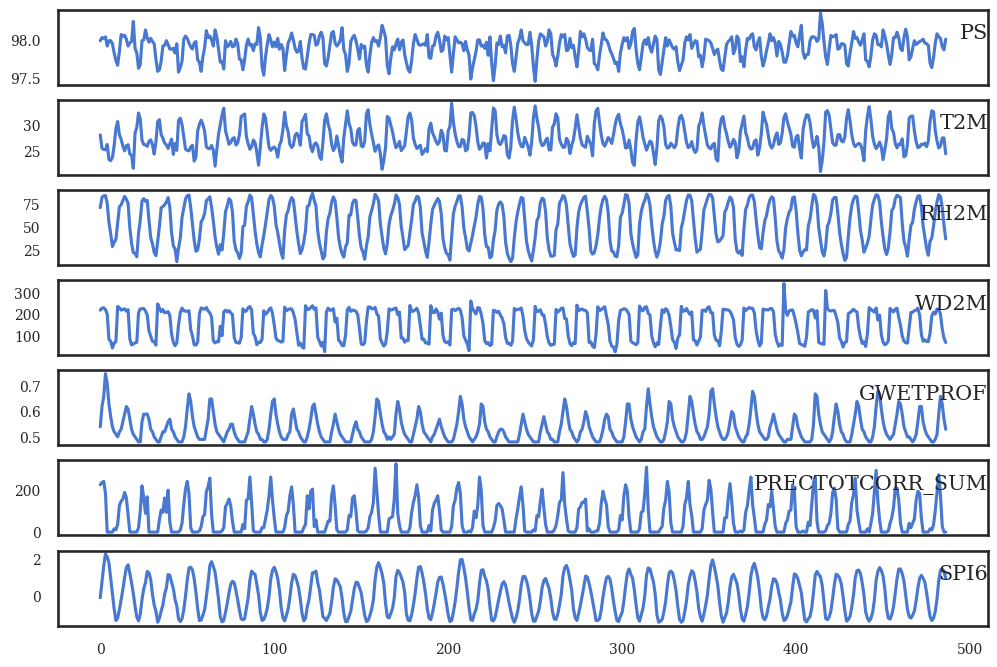

In [60]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [61]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=['SPI6'])
target = data['SPI6']

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.191011,0.071429,0.581214,0.219778,-0.087452,-0.555556,0.387123,-0.111216
1981-07-31,0.280899,-0.325228,0.889113,0.280456,-0.262357,0.037037,0.451598,0.747892
1981-08-31,0.258427,-0.354103,0.929485,0.287052,-0.673004,0.333333,0.483897,1.626116
1981-09-30,0.303371,-0.364742,0.934598,0.235336,-0.771863,1.000000,0.129041,2.275244
1981-10-31,0.033708,-0.209726,0.707442,0.099169,-0.825095,0.703704,-1.000000,2.122502


### Pearson Correlation

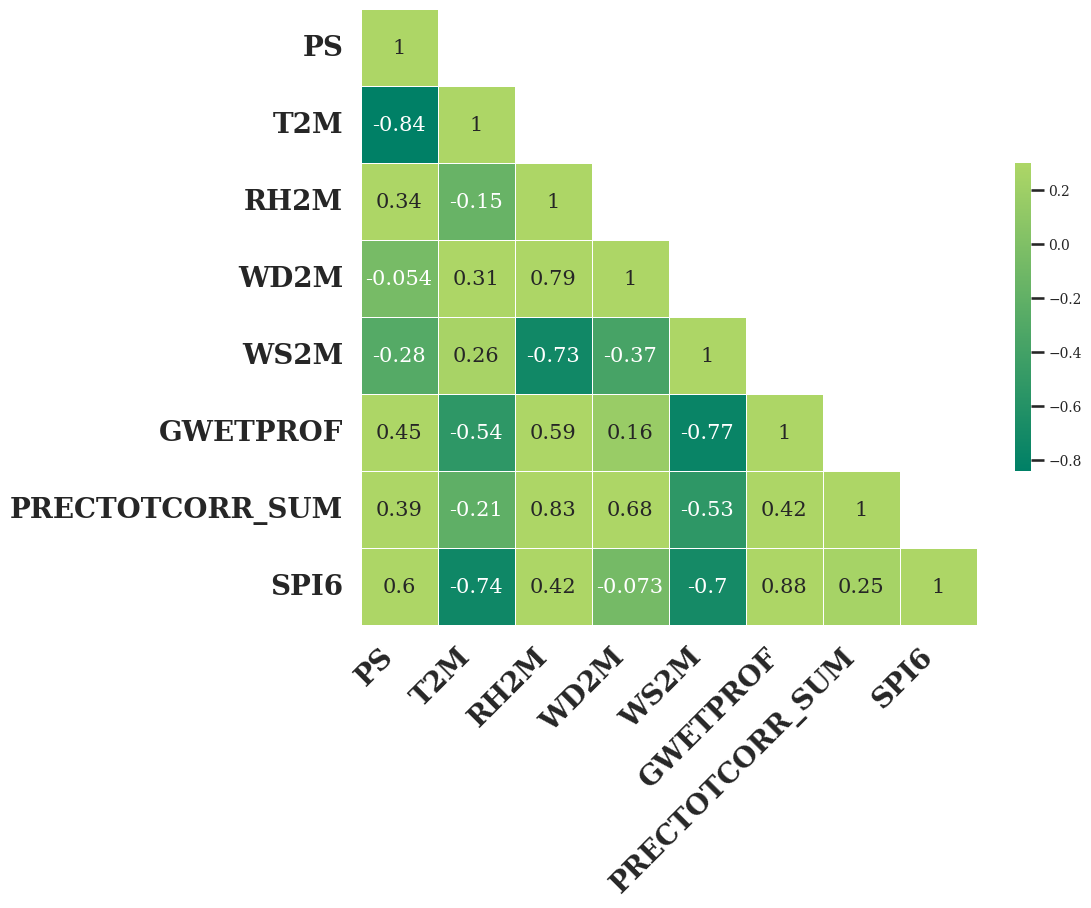

In [62]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
#plt.savefig('banikoara_heatmap_correlation')
plt.show()

#### Let's focus on the corelations between each variable and target variable

In [63]:
correlations_data = normalized_data.corr()[data_params['target_column']].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.882607
PS                 0.598602
RH2M               0.423335
PRECTOTCORR_SUM    0.254686
WD2M              -0.072987
WS2M              -0.696878
T2M               -0.737511
Name: SPI6, dtype: float64

In [64]:
correlations_data = np.abs(normalized_data.corr()[data_params['target_column']]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.882607
T2M                0.737511
WS2M               0.696878
PS                 0.598602
RH2M               0.423335
PRECTOTCORR_SUM    0.254686
WD2M               0.072987
Name: SPI6, dtype: float64

We can remove WD2M as the coefficient is very low

In [65]:
normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

,PS,T2M,RH2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,
1981-06-30,0.191011,0.071429,0.581214,-0.087452,-0.555556,0.387123,-0.111216
1981-07-31,0.280899,-0.325228,0.889113,-0.262357,0.037037,0.451598,0.747892
1981-08-31,0.258427,-0.354103,0.929485,-0.673004,0.333333,0.483897,1.626116
1981-09-30,0.303371,-0.364742,0.934598,-0.771863,1.000000,0.129041,2.275244
1981-10-31,0.033708,-0.209726,0.707442,-0.825095,0.703704,-1.000000,2.122502


In [66]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [70]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

In [71]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [72]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),RH2M(t-4),...,GWETPROF(t-1),PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.191011,0.071429,0.581214,-0.087452,-0.555556,0.387123,-0.111216,0.280899,-0.325228,0.889113,...,0.703704,-1.000000,2.122502,0.191011,-0.647416,0.152200,-0.346008,0.111111,-1.000000,1.778858
1981-12-31,0.280899,-0.325228,0.889113,-0.262357,0.037037,0.451598,0.747892,0.258427,-0.354103,0.929485,...,0.111111,-1.000000,1.778858,0.191011,-0.683891,-0.184228,-0.292776,-0.259259,-1.000000,0.957909
1982-01-31,0.258427,-0.354103,0.929485,-0.673004,0.333333,0.483897,1.626116,0.303371,-0.364742,0.934598,...,-0.259259,-1.000000,0.957909,0.101124,-0.586626,-0.559144,0.140684,-0.555556,-1.000000,0.098800
1982-02-28,0.303371,-0.364742,0.934598,-0.771863,1.000000,0.129041,2.275244,0.033708,-0.209726,0.707442,...,-0.555556,-1.000000,0.098800,-0.168539,-0.240122,-0.431301,-0.019011,-0.703704,-0.903227,-0.722149
1982-03-31,0.033708,-0.209726,0.707442,-0.825095,0.703704,-1.000000,2.122502,0.191011,-0.647416,0.152200,...,-0.703704,-0.903227,-0.722149,-0.393258,0.258359,-0.347329,0.019011,-0.777778,-0.935464,-1.352162


### Now we have 42 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [73]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6'], dtype='object')

In [74]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WS2M(t-5)', 'GWETPROF(t-5)',
       'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)', 'T2M(t-4)', 'RH2M(t-4)',
       'WS2M(t-4)', 'GWETPROF(t-4)', 'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)',
       'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WS2M(t-1)', 'GWETPROF(t-1)',
       'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)', 'RH2M(t)',
       'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)', 'SPI6(t)'],
      dtype='object')

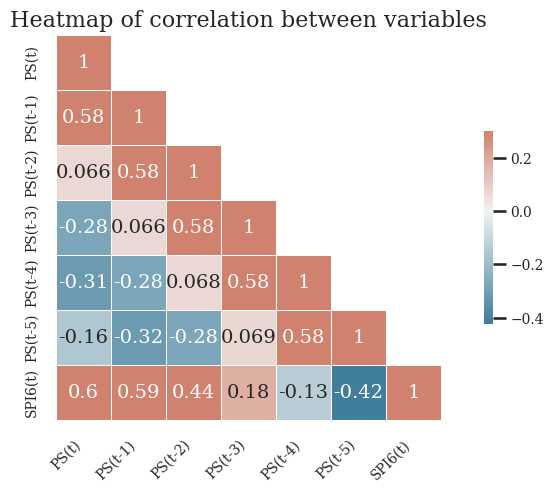

In [75]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [76]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t)      0.599569
PS(t-1)    0.587211
PS(t-2)    0.435686
PS(t-5)    0.422715
PS(t-3)    0.179776
PS(t-4)    0.134727
Name: SPI6(t), dtype: float64

#####  le lag 0 : PS(t) est le plus correllé avec un coef de 0.59

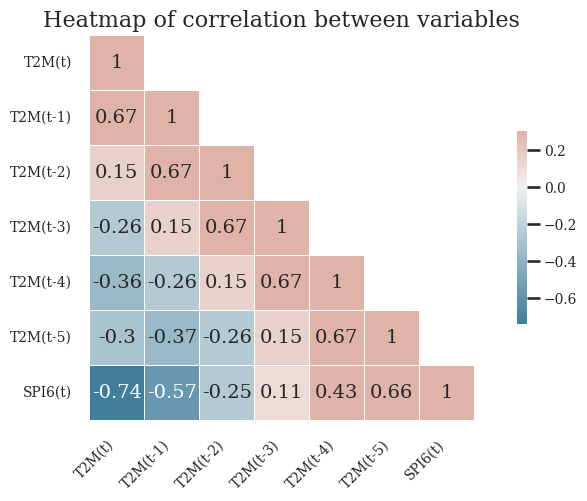

In [77]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [78]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.738695
T2M(t-5)    0.657392
T2M(t-1)    0.566377
T2M(t-4)    0.433566
T2M(t-2)    0.254938
T2M(t-3)    0.107446
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.73

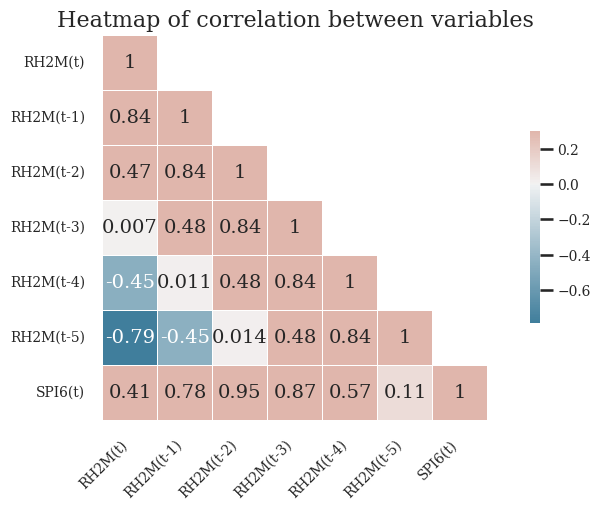

In [79]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [80]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.948855
RH2M(t-3)    0.871963
RH2M(t-1)    0.784055
RH2M(t-4)    0.566505
RH2M(t)      0.414912
RH2M(t-5)    0.105775
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.948855

In [81]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WS2M(t-5)', 'GWETPROF(t-5)',
       'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)', 'T2M(t-4)', 'RH2M(t-4)',
       'WS2M(t-4)', 'GWETPROF(t-4)', 'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)',
       'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WS2M(t-1)', 'GWETPROF(t-1)',
       'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)', 'RH2M(t)',
       'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)', 'SPI6(t)'],
      dtype='object')

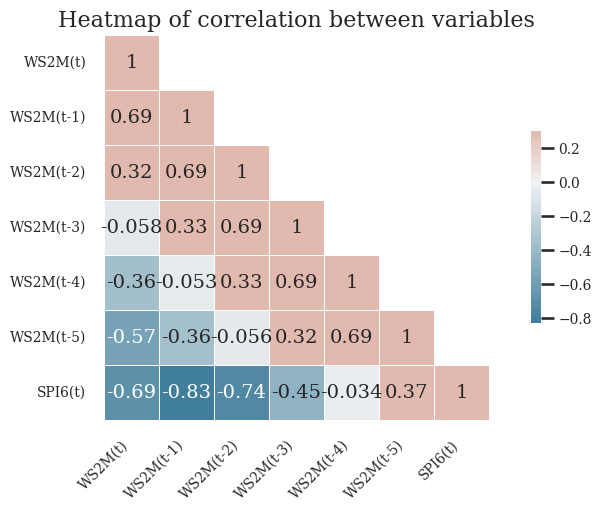

In [82]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [83]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.831984
WS2M(t-2)    0.744489
WS2M(t)      0.692897
WS2M(t-3)    0.448965
WS2M(t-5)    0.369990
WS2M(t-4)    0.034292
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.83

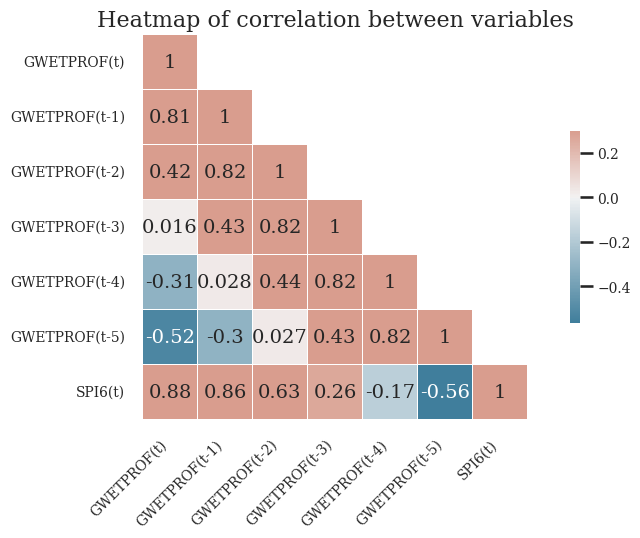

In [84]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [85]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.883425
GWETPROF(t-1)    0.859451
GWETPROF(t-2)    0.629451
GWETPROF(t-5)    0.564295
GWETPROF(t-3)    0.262879
GWETPROF(t-4)    0.170286
Name: SPI6(t), dtype: float64

le lag 0 est le plus correlé : GWETPROF(t)      0.883425

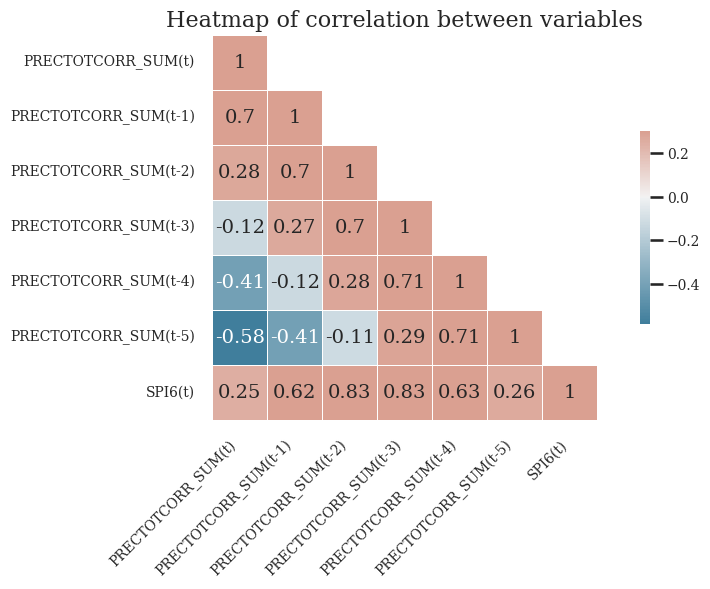

In [86]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [87]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.830974
PRECTOTCORR_SUM(t-2)    0.827751
PRECTOTCORR_SUM(t-4)    0.632285
PRECTOTCORR_SUM(t-1)    0.621049
PRECTOTCORR_SUM(t-5)    0.262750
PRECTOTCORR_SUM(t)      0.248593
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.830974

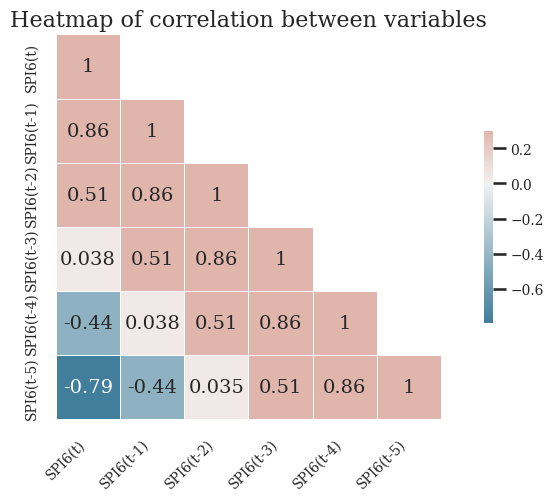

In [88]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [89]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.861646
SPI6(t-5)    0.794203
SPI6(t-2)    0.507602
SPI6(t-4)    0.435395
SPI6(t-3)    0.037580
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.861646

New dataset by choosing each  new lag

In [90]:
final_lagged_data = lagged_data[['PS(t)', 'T2M(t)', 'RH2M(t-2)','WS2M(t-1)',
                                 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'SPI6(t)']] 

final_lagged_data.head()

,PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),SPI6(t)
DATE,,,,,,,,
1981-11-30,0.191011,-0.647416,0.934598,-0.825095,0.111111,0.483897,2.122502,1.778858
1981-12-31,0.191011,-0.683891,0.707442,-0.346008,-0.259259,0.129041,1.778858,0.957909
1982-01-31,0.101124,-0.586626,0.152200,-0.292776,-0.555556,-1.000000,0.957909,0.098800
1982-02-28,-0.168539,-0.240122,-0.184228,0.140684,-0.703704,-1.000000,0.098800,-0.722149
1982-03-31,-0.393258,0.258359,-0.559144,-0.019011,-0.777778,-1.000000,-0.722149,-1.352162


In [91]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged.csv'
final_lagged_data.to_csv(lagged_data_path)

In [92]:
pd.read_csv('../datasets/lagged/Banikoara_lagged.csv')

,DATE,PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),SPI6(t)
0,1981-11-30,0.191011,-0.647416,0.934598,-0.825095,0.111111,0.483897,2.122502,1.778858
1,1981-12-31,0.191011,-0.683891,0.707442,-0.346008,-0.259259,0.129041,1.778858,0.957909
2,1982-01-31,0.101124,-0.586626,0.152200,-0.292776,-0.555556,-1.000000,0.957909,0.098800
3,1982-02-28,-0.168539,-0.240122,-0.184228,0.140684,-0.703704,-1.000000,0.098800,-0.722149
4,1982-03-31,-0.393258,0.258359,-0.559144,-0.019011,-0.777778,-1.000000,-0.722149,-1.352162
...,...,...,...,...,...,...,...,...,...
477,2021-08-31,0.303371,-0.311550,0.471942,-0.193916,-0.185185,-0.786634,-0.176165,0.818598
478,2021-09-30,0.258427,-0.252280,0.747813,-0.733840,0.333333,-0.366447,0.818598,1.391880
479,2021-10-31,0.011236,-0.018237,0.961513,-0.855513,0.111111,0.146047,1.391880,1.457227
480,2021-11-30,-0.078652,-0.015198,0.910914,-0.908745,-0.333333,0.680807,1.457227,1.331637
